In [1]:
import blocksci

import sys, os, os.path, socket
import numpy as np
import zarr
import time
import pandas as pd
from collections import defaultdict
from decimal import Decimal, getcontext
import datetime
import math
# from conformity import attribute_conformity
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
import networkx as nx
from networkx.utils import py_random_state
import numpy as np
from NEMtropy import DirectedGraph
from NEMtropy import UndirectedGraph
from NEMtropy import matrix_generator as mg
from NEMtropy.network_functions import build_adjacency_from_edgelist
import graph_tool.all as gt
from datetime import datetime, timedelta
from tqdm import tqdm
import json


def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

def clamp(n, minn, maxn):
    if n < minn:
        return minn
    elif n > maxn:
        return maxn
    else:
        return n

# Counting number of True and False values in cluster_is_black_ground_truth 

In [7]:
array_zarr = zarr.load('uniform_black/heur_1_data/cluster_is_black_ground_truth.zarr') #load zarr file into array
#df = pd.DataFrame (array_zarr) ## convert your array into a dataframe
#filepath = 'zarr_to_excel.csv'
#df.to_csv(filepath, index=False)
countTrue = np.where(array_zarr==True)
countFalse = np.where(array_zarr==False)
element_count_False = countFalse[0].size
element_count_True = countTrue[0].size
print(len(array_zarr))
print(element_count_False)
print(element_count_True)
print(array_zarr)
black_clusters = set(countTrue[0])
print(black_clusters)
for i in countTrue:
    print(i)

591692716
591692581
135
[False False False ... False False False]
{94921217, 94987784, 94968329, 93820427, 94981133, 94285328, 95277585, 99064866, 94969379, 94977574, 94912551, 99055654, 94907956, 99422262, 95275069, 94984257, 94949444, 94624325, 94943306, 94943818, 94797389, 94974547, 94947412, 94950484, 94985299, 94985822, 92044383, 94668900, 94982761, 99066985, 94963307, 94620783, 94894707, 94954100, 94934648, 94981757, 94904451, 93822603, 94950027, 94952593, 94986385, 96015866, 94998167, 99061401, 99061408, 94913697, 94951587, 88316586, 94897322, 94978733, 94971061, 94905527, 94944952, 94939326, 94972606, 107302595, 94978757, 94944968, 94947040, 94961888, 94981858, 94616297, 94941929, 94910188, 89576173, 115726064, 94966001, 97655034, 94926589, 94982403, 94937864, 94918924, 90613521, 94918931, 93821719, 94978840, 94972700, 94887197, 101080866, 94900520, 94982968, 112150330, 94987067, 94898493, 94914365, 94969678, 94928208, 94977365, 94966614, 94967639, 94969686, 86826333, 97655136,

In [ ]:
countFalse = np.where(array_zarr==False)
element_count_False = countFalse[0].size
element_count_True = countTrue[0].size
print(len(array_zarr))
print(element_count_False)
print(element_count_True)
print(array_zarr)
black_clusters = set(countTrue[0])
print(black_clusters)
for i in countTrue:
    print(i)

# Reading address_cluster_map.zarr

In [ ]:
array_zarr = zarr.load('/export/consensus-2/blockchain_parsed/bitcoin/heur_1_data/address_cluster_map.zarr') #load zarr file into array
df = pd.DataFrame (array_zarr) ## convert your array into a dataframe
# filepath = 'zarr_to_excel.csv'
# df.to_csv(filepath, index=True)
print(df)

                    0
0           591352664
1           591352665
2           591352666
3           591352667
4           591352668
...               ...
4022303267  591352659
4022303268  591352660
4022303269  591352661
4022303270  591352662
4022303271  591352663

[4022303272 rows x 1 columns]


# Importing saved results NPY vs ZARR:

In [ ]:
for i in range(49990,49996):
    # import npy and place in dict
    start_time = datetime.datetime.now()
    P = np.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data/current_assets/current_assets_block_{str(i).zfill(6)}.npy', allow_pickle=True) #load gives an object array containing this dictionary:
    current_assets =defaultdict(lambda: np.zeros(2))
    current_assets.update(P.item())
    end_time = datetime.datetime.now()
    print(end_time - start_time)

    print(f'current_assets length')
    print(len(current_assets))

    start_time = datetime.datetime.now()
    # import zarr and place in dict
    current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets/current_assets_values_block_{str(i).zfill(6)}.zarr') #load gives an object array containing this dictionary:
    current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets_index/current_assets_index_block_{str(i).zfill(6)}.zarr')
    current_assets_zarr = dict(zip(current_assets_index_zarr, current_assets_zarr))
    end_time = datetime.datetime.now()
    print(end_time - start_time)
    print(f'current_assets_zarr length')
    print(len(current_assets_zarr))

    for key in current_assets.keys() & current_assets_zarr.keys():
        value1 = current_assets[key]
        value2 = current_assets_zarr[key]
        if value1 != value2:
            print("error")
    
    # i = 0
    # for k, v in current_assets_zarr.items():
    #     print(f'{k}:{format_e(Decimal(v))}, ', end='')


    # i = 0
    # for k, v in current_assets.items():
    #     if v != 0.0 :
    #         print(f'{k}:{format_e(Decimal(v))}, ', end='')
        # if i == 9:
        #     print('\n')
        #     i = 0
        # i+=1

# Importing saved results of dark ratio daily :

In [2]:
dark_ratio_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/dark_ratio/dark_ratio_2016-03-19.zarr') #load gives an object array containing this dictionary:
# dark_ratio_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v2/daily/dark_ratio_index/dark_ratio_index_2010-07-25.zarr')
dark_ratio_zarr = dict(zip(dark_ratio_zarr["dark_ratio_index"], dark_ratio_zarr["dark_ratio_values"]))

size = len(dark_ratio_zarr)
print(f'size of dark_ratio_zarr={size}')

undesired_values = 0
normal_values = 0
zero_values = 0
nan_values= 0
inf_values=0
for key in dark_ratio_zarr.keys():

    if dark_ratio_zarr[key] < 0 or dark_ratio_zarr[key] > 1:
        undesired_values += 1

    if math.isnan(dark_ratio_zarr[key]):
        nan_values += 1
    
    if math.isinf(dark_ratio_zarr[key]):
        inf_values += 1
        
    if dark_ratio_zarr[key] > 0 and dark_ratio_zarr[key] <= 1 :
        normal_values += 1
    
    if dark_ratio_zarr[key] == 0 :
        zero_values += 1

print(f'number of normal_values={normal_values}, ratio of normal_values={normal_values/size}')
print(f'number of undesired_values={undesired_values}, ratio of undesired_values (negative or more than 1)={undesired_values/size}')
print(f'number of zero_values={zero_values}, ratio of zero_values={zero_values/size}')
print(f'number of nan_values={nan_values}, ratio of nan_values={nan_values/size}')
print(f'number of inf_values={inf_values}, ratio of inf_values={inf_values/size}')

size of dark_ratio_zarr=55521836
number of normal_values=49452262, ratio of normal_values=0.8906813168065983
number of undesired_values=0, ratio of undesired_values (negative or more than 1)=0.0
number of zero_values=6069574, ratio of zero_values=0.1093186831934016
number of nan_values=0, ratio of nan_values=0.0
number of inf_values=0, ratio of inf_values=0.0


# Importing saved results of current_assets daily :

In [3]:
current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/current_assets/current_assets_2016-03-19.zarr') #load gives an object array containing this dictionary:
# current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v2/daily/current_assets_index/current_assets_index_2014-07-25.zarr')

# current_assets_zarr_old = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final/daily/dark_ratio/dark_ratio_values_2012-12-04.zarr') #load gives an object array containing this dictionary:
# current_assets_index_zarr_old = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final/daily/dark_assets_index/dark_ratio_index_2012-12-04.zarr')

# current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final_daily_weekly_new/daily/dark_ratio/dark_ratio_values_2013-05-04.zarr') #load gives an object array containing this dictionary:
# current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_final_daily_weekly_new/daily/dark_ratio_index/dark_ratio_index_2011-04-04.zarr')

current_assets_zarr = dict(zip(current_assets_zarr["current_assets_index"], current_assets_zarr["current_assets_values"]))
# current_assets_zarr_old = dict(zip(current_assets_index_zarr_old, current_assets_zarr_old))

# if current_assets_zarr_old == current_assets_zarr:
#     print("true")

size = len(current_assets_zarr)
print(f'size of current_assets_zarr={size}')
# print(len(current_assets_zarr_old))
# for k, v in current_assets_zarr.items():
#     for kk, vv in current_assets_zarr_old:
#for key in current_assets_zarr.keys() & current_assets_zarr_old.keys():

undesired_values = 0
normal_values = 0
zero_values = 0
nan_values= 0
inf_values=0

for key in current_assets_zarr.keys():

        if current_assets_zarr[key] < 0:
            undesired_values += 1
        
        if math.isnan(current_assets_zarr[key]):
            nan_values += 1
    
        if math.isinf(current_assets_zarr[key]):
            inf_values += 1

        if current_assets_zarr[key] > 0:
            normal_values += 1
        
        if current_assets_zarr[key] == 0:
            zero_values += 1

print(f'number of normal_values={normal_values}, ratio of normal_values={normal_values/size}')
print(f'number of undesired_values={undesired_values}, ratio of undesired_values (negative)={undesired_values/size}')
print(f'number of zero_values={zero_values}, ratio of zero_values={zero_values/size}')
print(f'number of nan_values={nan_values}, ratio of nan_values={nan_values/size}')
print(f'number of inf_values={inf_values}, ratio of inf_values={inf_values/size}')
# i = 0
# count = 0
# total = 0
# for k, v in current_assets_zarr.items():
    
#     count = count + 1
#     total = total + v
#     # if i == 9:
#     #     print('\n')
#     #     i = 0
#     # i+=1
# print(count)
# print(total)
#311280386000000.0 new on 2010-05-04
#311280386000000.0 heur_1_data_final on 2010-05-04
#316704954000000.0 old on 2010-05-04
#695143585860158.0 new on 2011-05-04
#695143585860158.0 heur_1_data_final on 2011-05-04
#854471174476544.0 old on 2011-05-04
#xxx new on 2012-05-04
#1019590075699663.4 heur_1_data_final on 2012-05-04
#1843247658153783.8 old on 2012-05-04

# Notes: my code always saves dark ratio, his code saves only when nodes have made transactions

# with open('result.txt', 'a') as fp:
#     fp.write(print(current_assets_zarr))

size of current_assets_zarr=55521836
number of normal_values=51968939, ratio of normal_values=0.9360090145433951
number of undesired_values=1584, ratio of undesired_values (negative)=2.852931592535953e-05
number of zero_values=3551313, ratio of zero_values=0.0639624561406795
number of nan_values=0, ratio of nan_values=0.0
number of inf_values=0, ratio of inf_values=0.0


# Importing saved results of dark_assets daily :

In [4]:
dark_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/dark_assets/dark_assets_2016-03-19.zarr') #load gives an object array containing this dictionary:
# dark_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/final/heur_1_data_v3/daily/dark_assets_index/dark_assets_index_2014-07-25.zarr')

dark_assets_zarr = dict(zip(dark_assets_zarr["dark_assets_index"], dark_assets_zarr["dark_assets_values"]))

size = len(dark_assets_zarr)
print(f'size of dark_assets_zarr={size}')

undesired_values = 0
normal_values = 0
zero_values = 0
nan_values= 0
inf_values=0
for key in dark_assets_zarr.keys():

        if dark_assets_zarr[key] < 0 :
            undesired_values += 1

        if math.isnan(dark_assets_zarr[key]):
            nan_values += 1
    
        if math.isinf(dark_assets_zarr[key]):
            inf_values += 1

        
        if dark_assets_zarr[key] > 0:
            normal_values += 1

        if dark_assets_zarr[key] == 0:
            zero_values += 1

print(f'number of normal_values={normal_values}, ratio of normal_values={normal_values/size}')
print(f'number of undesired_values={undesired_values}, ratio of undesired_values (negative)={undesired_values/size}')
print(f'number of zero_values={zero_values}, ratio of zero_values={zero_values/size}')
print(f'number of nan_values={nan_values}, ratio of nan_values={nan_values/size}')
print(f'number of inf_values={inf_values}, ratio of inf_values={inf_values/size}')

size of dark_assets_zarr=55519021
number of normal_values=49452262, ratio of normal_values=0.890726477327473
number of undesired_values=1151, ratio of undesired_values (negative)=2.0731633578337054e-05
number of zero_values=6065608, ratio of zero_values=0.10925279103894861
number of nan_values=0, ratio of nan_values=0.0
number of inf_values=0, ratio of inf_values=0.0


In [21]:
for k, v in dark_ratio_zarr.items():
    if k in black_clusters:
        print(f" black ground truth node with k={k} and v={v}") 

for k, v in current_assets_zarr.items():
    if k in black_clusters:
        print(f" black ground truth node with k={k} and v={v}")

 black ground truth node with k=79800777 and v=1.0
 black ground truth node with k=82285475 and v=1.0
 black ground truth node with k=79800777 and v=433669600229
 black ground truth node with k=82285475 and v=313902000


# Importing saved results per block:


In [ ]:
for i in range(49995,49996):
    current_assets_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets/current_assets_values_block_{str(i).zfill(6)}.zarr') #load gives an object array containing this dictionary:
    current_assets_index_zarr = zarr.load(f'/local/scratch/exported/blockchain_parsed/bitcoin_darknet/gs_group/grayscale_op_ali/heur_1_data_zarr/current_assets_index/current_assets_index_block_{str(i).zfill(6)}.zarr')
    print(f'current_assets before')
    print(len(current_assets_zarr))
    i = 0
    for v, k in zip(current_assets_zarr, current_assets_index_zarr):
        print(f'{k}:{format_e(Decimal(v))}, ', end='')
        # if i == 9:
        #     print('\n')
        #     i = 0
        # i+=1

# Random Graph Testing:

Drawing graph of size 21


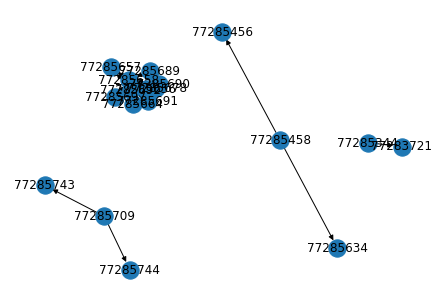

In [3]:
def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(40, 40), dpi=200)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    # cut = 1.00
    # xmax = cut * max(xx for xx, yy in pos.values())
    # ymax = cut * max(yy for xx, yy in pos.values())
    # plt.xlim(0, xmax)
    # plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

g = nx.DiGraph()

networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
g = nx.read_graphml(unit_graph_file)

#Assuming that the graph g has nodes and edges entered
save_graph(g,"jsonResults_old_MP/graphs/weekly_graph_2010-01-05.jpg")

#it can also be saved in .svg, .png. or .ps formats




print(f"Drawing graph of size {g.size()}")
nx.draw(g, pos=nx.spring_layout(g),with_labels=True)
# node_to_conformity = attribute_conformity(g.to_undirected(), list(np.arange(1, 4, 0.2)), ['color'], profile_size=1)
# print(node_to_conformity)

0.13725490196078433
Original graph: 18 nodes, 21 edges
Erdos-Renyi random graph: 18 nodes, 21 edges


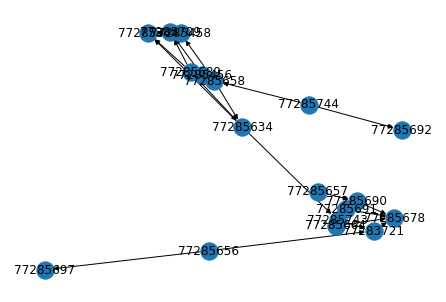

In [133]:
import random
# Get the number of nodes and edge density of the existing graph
n = g.number_of_nodes()
# calculate the number of edges in G
m = len(g.edges())

# Calculate the probability p
p = (2 * m) / (n * (n - 1))
print(p)

# Generate an Erdos-Renyi random graph with the same number of nodes and edge density
# ER = nx.gnp_random_graph(n, p, directed=True)

# Create a new empty directed graph
ER = nx.DiGraph()

# Copy over the nodes and their attributes from the original graph to the new graph
for node, attrs in g.nodes(data=True):
    ER.add_node(node, **attrs)

# Randomly assign one incoming or outgoing edge to each node
while ER.number_of_edges() < g.number_of_edges():

    for node in ER.nodes():
        if ER.number_of_edges() >= g.number_of_edges():
            break

        if random.random() < 0.5:
            # Assign outgoing edge
            neighbors = list(ER.nodes() - {node})
            v = random.choice(neighbors)
            ER.add_edge(node, v)
        else:
            # Assign incoming edge
            neighbors = list(ER.nodes() - {node})
            u = random.choice(neighbors)
            ER.add_edge(u, node)



# Output the number of nodes and edges in each graph
print(f"Original graph: {n} nodes, {g.number_of_edges()} edges")
print(f"Erdos-Renyi random graph: {ER.number_of_nodes()} nodes, {ER.number_of_edges()} edges")
nx.draw(ER, pos=nx.spring_layout(ER),with_labels=True)


# Check if Erdos reyni binomial:

In [31]:
import networkx as nx
import scipy.stats as stats

# Generate a random graph
G = nx.read_graphml("2010-01-16.graphml.bz2")

# Calculate the degree distribution
degrees = [deg for node, deg in G.degree()]

# Calculate the mean and variance of the degree distribution
mean = sum(degrees) / len(degrees)
variance = sum((deg - mean) ** 2 for deg in degrees) / len(degrees)

# Calculate the expected binomial distribution parameters
p = mean / len(G.nodes())
n = len(G.nodes())

# Calculate the confidence intervals for the binomial distribution
lower, upper = stats.binom.interval(0.95, n, p)

# Check if the degree distribution fits the binomial distribution
if all(lower <= deg <= upper for deg in degrees):
    print("The degree distribution fits a binomial distribution with 95% confidence intervals.")
else:
    print("The degree distribution does not fit a binomial distribution with 95% confidence intervals.")


The degree distribution fits a binomial distribution with 95% confidence intervals.


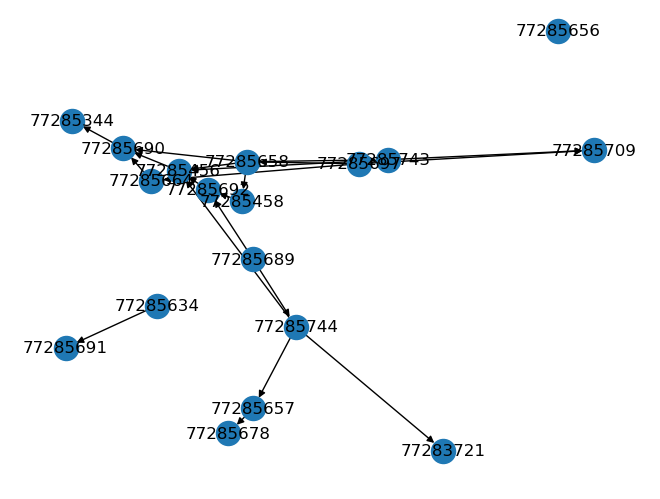

In [15]:
import graph_tool.all as gt

# Load the original directed graph from a file
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
g = gt.load_graph(unit_graph_file)

# print(f"Original graph: {g.number_of_nodes()} nodes, {g.number_of_edges()} edges")

# Convert the directed graph to an undirected graph
ug = gt.GraphView(g, directed=True)

# Rewire the undirected graph using the random_rewire() function
gt.random_rewire(ug, model="erdos")



unitsavelocation = "2010-01-16.graphml.bz2"
ug.save(unitsavelocation)

G = nx.read_graphml("2010-01-16.graphml.bz2")
nx.draw(G, pos=nx.spring_layout(G),with_labels=True)



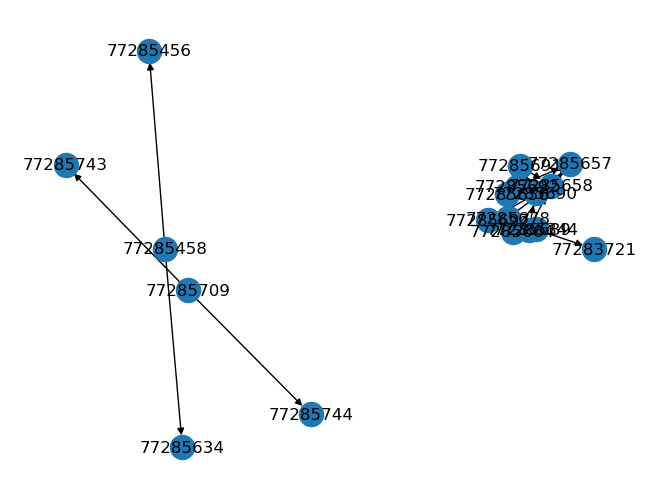

In [49]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
G = nx.read_graphml(unit_graph_file)
nx.draw(G, pos=nx.spring_layout(G),with_labels=True)

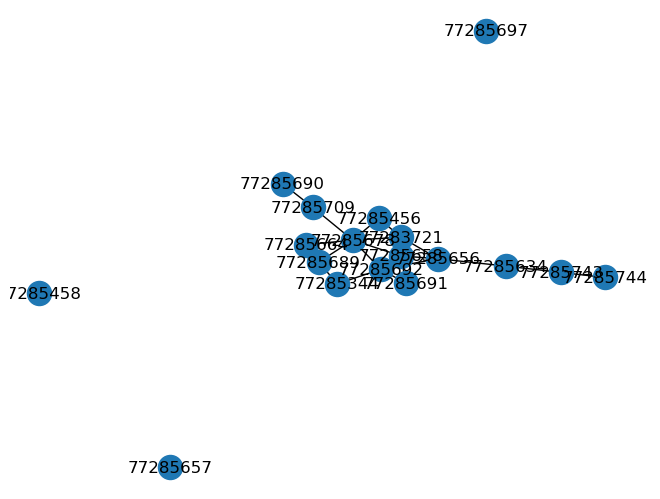

In [48]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full_random_gt/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
G = nx.read_graphml(unit_graph_file)
nx.draw(G, pos=nx.spring_layout(G),with_labels=True)

In [11]:
# Load the original directed graph from a file
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-05-22.graphml.bz2"
g = gt.load_graph(unit_graph_file)
print(g)
# state = gt.minimize_nested_blockmodel_dl(g)
state = gt.minimize_blockmodel_dl(g)
state.draw(output="football-sbm-fit.pdf")
# state.draw(output="celegans-hsbm-fit.pdf")

<Graph object, directed, with 466 vertices and 440 edges, 5 internal vertex properties, 3 internal edge properties, 1 internal graph property, at 0x7f85545e0e50>


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f85545e0e50, at 0x7f85545e0df0>

# Test exponential graphs generation

In [ ]:
# Load the original directed graph from a file
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2011-05-21.graphml.bz2"
g= nx.DiGraph()
g = nx.read_graphml(unit_graph_file)
nx.draw(g, pos=nx.spring_layout(g))

# Using edgelist

In [2]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2009-09-26.graphml.bz2"
g = gt.load_graph(unit_graph_file)

edge_list = g.get_edges(eprops=[g.ep.value])

# print(adj_mat)


# Create directed graph object
graph = DirectedGraph(edgelist=edge_list)

# We can the see the graph sequence of the graph by tapping
print("Out strength sequence ",graph.out_strength)
print("In strength sequence ",graph.in_strength)


# Similarly to the binary case, we can solve the weighted model by solve_tool
graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="dcm_exp",
                 method_adjacency="newton")

# Lets check if the optimisation was successful by printing the errors on the degree and strength sequences
print(graph.error_degree, graph.error_strength)

Out strength sequence  [8.0e+10 0.0e+00 6.5e+10 1.5e+11 0.0e+00 5.0e+10]
In strength sequence  [0.00e+00 1.95e+11 0.00e+00 0.00e+00 1.50e+11 0.00e+00]


/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numba/core/utils.py:554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/NEMtropy/models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/NEMtropy/models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numba/core/utils.py:554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Invalid use of getiter with parameters (none)

During: typing of intrinsic-call at /home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/NEMtropy/models_functions.py (4091)

File "../../../../../../home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/NEMtropy/models_functions.py", line 4091:
def loglikelihood_prime_crema_directed(beta, args):
    <source elided>
    
    for i in nz_index_out:
    ^


# Using adjacency

In [3]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"

g = gt.load_graph(unit_graph_file)

# compute the adjacency matrix with edge weights
adj_mat = gt.adjacency(g, weight=g.edge_properties["value"])

graph = DirectedGraph(adj_mat)


# We can the see the graph sequence of the graph by tapping
print("Out strength sequence ",graph.out_strength)
print("In strength sequence ",graph.in_strength)

graph.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="dcm_exp",
                 method_adjacency="newton")

print("number of nodes ",g.num_vertices())
print("number of edges ",g.num_edges())
print(graph.error_degree, graph.error_strength)


Out strength sequence  [0.000e+00 2.510e+10 0.000e+00 2.700e+09 2.300e+09 0.000e+00 4.900e+09
 4.050e+10 4.700e+09 4.580e+09 4.575e+09 4.574e+09 5.000e+09 0.000e+00
 0.000e+00 0.000e+00 4.900e+09 1.000e+08]
In strength sequence  [2.510e+10 0.000e+00 5.000e+09 0.000e+00 0.000e+00 5.000e+09 4.900e+09
 5.000e+08 4.700e+09 4.580e+09 4.575e+09 4.574e+09 2.000e+10 1.000e+10
 1.000e+10 5.000e+09 0.000e+00 0.000e+00]


/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numba/core/utils.py:554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/NEMtropy/models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/NEMtropy/models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numba/core/utils.py:554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numba/core/utils.py:554: NumbaExpe


solution error = 59942641805.1418
number of nodes  18
number of edges  21
1.7763568394002505e-15 59942641805.1418


# Plot random assortativity from graph data: complete

In [32]:
def daterange(date1, date2, by=1):
    return [  date1 + timedelta(n) for n in range(0, int((date2 - date1).days)+1, by) ]  

start_date = datetime.strptime("2009-01-10", "%Y-%m-%d").date()
end_date = datetime.strptime("2018-05-12", "%Y-%m-%d").date()
print(f'start_date is set as: {start_date}')
print(f'end_date is set as: {end_date}')

datelist = daterange(start_date, end_date, by=7)
tqdm_bar = tqdm(datelist, desc="processed files")

x_values = []
y_values_assortativity = []

for timeunit in tqdm_bar:

    g = nx.DiGraph()

    savelocation = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full_random_gt/week"
    unitsavelocation = f"{savelocation}/{timeunit.strftime('%Y-%m-%d')}.graphml.bz2"

    if os.path.exists(unitsavelocation):
        try:
            g = gt.load_graph(unitsavelocation) 
            x_values.append(timeunit.strftime('%Y-%m-%d'))
            y_values_assortativity.append(float(g.graph_properties["DR_color_assortativity"]))
        except OSError:
            continue
    else:
        continue

    tqdm_bar.set_description(f"week of '{timeunit.strftime('%Y-%m-%d')} took sec", refresh=True)

with open(f'jsonResults_v3/h1/random/directed_random_assortativity_2009-01-03_{end_date}.json', 'w') as f:
    results_dict = dict(zip(x_values, y_values_assortativity))
    save_json = json.dumps(results_dict)
    f.write(save_json)

dates = matplotlib.dates.date2num(x_values)
fig = matplotlib.pyplot.figure(figsize=(16, 9), dpi=100)
matplotlib.pyplot.style.use('seaborn-darkgrid')
matplotlib.pyplot.legend(loc="upper left")
matplotlib.pyplot.plot_date(dates, y_values_assortativity, 'kx', color='black', linewidth=3)
matplotlib.pyplot.legend()
matplotlib.pyplot.gca().set_title("DR Attribute Assortativity")
matplotlib.pyplot.savefig(f'jsonResults_v3/h1/graphs/directed_random_assortativityPlot.png', dpi=100)
plt.close(fig)

print('Process terminated, graphs and attributes created.')

start_date is set as: 2009-01-10
end_date is set as: 2018-05-12


week of '2018-05-12 took sec: 100%|██████████| 488/488 [2:35:39<00:00, 19.14s/it]  


NameError: name 'matplotlib' is not defined

# Testing new network builder

In [6]:
def daterange(date1, date2, by=1):
    return [  date1 + timedelta(n) for n in range(0, int((date2 - date1).days)+1, by) ]       

start_date = datetime.strptime("2009-01-10", "%Y-%m-%d").date()
end_date = datetime.strptime("2018-05-12", "%Y-%m-%d").date()
print(f'start_date is set as: {start_date}')
print(f'end_date is set as: {end_date}')

datelist = daterange(start_date, end_date, by=7)
tqdm_bar = tqdm(datelist, desc="processed files")

for timeunit in tqdm_bar:
    # build_network_with_attributes(timeunit)
    print("current:", timeunit, "previous:", timeunit - timedelta(7))
    
                    
print('Process terminated, graphs and attributes created.')

start_date is set as: 2009-01-10
end_date is set as: 2018-05-12


processed files: 100%|██████████| 488/488 [00:00<00:00, 27688.17it/s]

current: 2009-01-10 previous: 2009-01-03
current: 2009-01-17 previous: 2009-01-10
current: 2009-01-24 previous: 2009-01-17
current: 2009-01-31 previous: 2009-01-24
current: 2009-02-07 previous: 2009-01-31
current: 2009-02-14 previous: 2009-02-07
current: 2009-02-21 previous: 2009-02-14
current: 2009-02-28 previous: 2009-02-21
current: 2009-03-07 previous: 2009-02-28
current: 2009-03-14 previous: 2009-03-07
current: 2009-03-21 previous: 2009-03-14
current: 2009-03-28 previous: 2009-03-21
current: 2009-04-04 previous: 2009-03-28
current: 2009-04-11 previous: 2009-04-04
current: 2009-04-18 previous: 2009-04-11
current: 2009-04-25 previous: 2009-04-18
current: 2009-05-02 previous: 2009-04-25
current: 2009-05-09 previous: 2009-05-02
current: 2009-05-16 previous: 2009-05-09
current: 2009-05-23 previous: 2009-05-16
current: 2009-05-30 previous: 2009-05-23
current: 2009-06-06 previous: 2009-05-30
current: 2009-06-13 previous: 2009-06-06
current: 2009-06-20 previous: 2009-06-13
current: 2009-06

# Community Detection / Modularity calculation according to SBM and DR + Randomized version:

In [7]:
# Load the original directed graph from a file
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2014-10-18.graphml.bz2"
g = gt.load_graph(unit_graph_file)

print(g)
# state = gt.minimize_nested_blockmodel_dl(g)
# state.draw(output="celegans-hsbm-fit_NEw.pdf")

state = gt.minimize_blockmodel_dl(g)
blocks = state.get_blocks()

# Iterate over the vertices and assign the block values as vertex attributes
block_property = g.new_vertex_property("int")
for vertex in g.vertices():
    block_property[vertex] = blocks[vertex]

# Add the block_property as a vertex attribute
g.vertex_properties["block"] = block_property

g.list_properties()
# state.draw(vertex_fill_color=g.vp["dark_ratio"].a, output="football-sbm-fit_New2.pdf")
print(f'real modularity according to DR: {gt.modularity(g, g.vp["dark_ratio"], weight=g.ep["value"])}')
print(f'real modularity according to SBM blocks: {gt.modularity(g, g.vp["block"], weight=g.ep["value"])}')

# Convert the directed graph to an undirected graph
ug = gt.GraphView(g, directed=True)

# Rewire the undirected graph using the random_rewire() function
gt.random_rewire(ug, model="erdos")

print(f'random modularity according to DR: {gt.modularity(ug, ug.vp["dark_ratio"], weight=ug.ep["value"])}')
print(f'random modularity according to SBM: {gt.modularity(ug, ug.vp["block"], weight=ug.ep["value"])}')



<Graph object, directed, with 433825 vertices and 962237 edges, 5 internal vertex properties, 3 internal edge properties, 1 internal graph property, at 0x7f6258a9feb0>


# Louvain python

In [11]:
import community

networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2014-10-18.graphml.bz2"
g = nx.read_graphml(unit_graph_file)

undirected_g = g.to_undirected()

louvain_partition = community.best_partition(undirected_g, weight='value')
modularity2 = community.modularity(louvain_partition, undirected_g, weight='value')
print("The modularity Q based on networkx is {}".format(modularity2))

The modularity Q based on networkx is 0.898687140246397


# GT louvain

In [2]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2014-10-18.graphml.bz2"
g = gt.load_graph(unit_graph_file)

# Perform Louvain-Infomap algorithm for directed graphs
state = gt.minimize_blockmodel_dl(g, state=gt.ModularityState)

g.list_properties()

modularity = state.modularity()

# Obtain the partition of a network according to the maximization of Newman’s modularity.
print(f'lovain modularity according to DR: {modularity}')

# Convert the directed graph to an undirected graph
ug = gt.GraphView(g, directed=True)

# Rewire the undirected graph using the random_rewire() function
gt.random_rewire(ug, model="erdos",n_iter=10, edge_sweep=True)

# Obtain the partition of a network according to the maximization of Newman’s modularity.
state_random = gt.minimize_blockmodel_dl(ug, state=gt.ModularityState)

modularity_random = state_random.modularity()

print(f'random modularity according to DR: {modularity_random}')



DR_color_assortativity     (graph)   (type: double, val: 0.5138631460728921)
_graphml_vertex_id         (vertex)  (type: string)
color                      (vertex)  (type: string)
current_assets             (vertex)  (type: int64_t)
dark_assets                (vertex)  (type: int64_t)
dark_ratio                 (vertex)  (type: long double)
_graphml_edge_id           (edge)    (type: string)
n_tx                       (edge)    (type: int64_t)
value                      (edge)    (type: long double)
lovain modularity according to DR: 0.7395256812521727
random modularity according to DR: 0.49195784110510216


In [14]:
import random
# Set the number of vertices and edge probability
num_vertices = 10000  # Set the desired number of vertices
edge_probability = 0.1  # Set the desired edge probability

# Create an empty graph
g = gt.Graph(directed=True)

# Add vertices to the graph
g.add_vertex(num_vertices)

# Create an edge property map for the weights
weight_prop = g.new_edge_property("double")

# Iterate over pairs of vertices and add edges with the specified probability
for v1 in g.vertices():
    for v2 in g.vertices():
        if v1 != v2 and random.random() < edge_probability:
            # Generate a random weight for the edge
            weight = random.random()

            # Add the weighted edge and assign the weight
            e = g.add_edge(v1, v2)
            weight_prop[e] = weight

# Assign the weight property map to the graph
g.edge_properties["weight"] = weight_prop

# Perform Louvain-Infomap algorithm for directed graphs
state = gt.minimize_blockmodel_dl(g, state=gt.ModularityState)

modularity_random = state.modularity()
print(f'random modularity according to DR: {modularity_random}')

random modularity according to DR: 0.017679734456347778


# Clustering coefficient, Average path length, Network diameter

In [39]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
g = gt.load_graph(unit_graph_file)

clustering = gt.local_clustering(g).a

# Get all vertex descriptors in the graph
vertices = g.get_vertices()

# Initialize an array to store the shortest path lengths
path_lengths = np.zeros(len(vertices))

for i, v in enumerate(vertices):
    dist_map = gt.shortest_distance(g, source=v)

    # Remove infinite values from the distance map
    dist_map[dist_map == np.inf] = -1

    # Compute the maximum path length for the current vertex
    path_lengths[i] = np.max(dist_map[dist_map != -1])

# Compute the average path length
average_path_length = np.mean(path_lengths)

# Compute the network diameter
network_diameter = np.max(path_lengths)

print("Clustering Coefficient:", np.mean(clustering))
print("Average Path Length:", average_path_length)
print("Network Diameter:", network_diameter)

Clustering Coefficient: 0.28518518518518515
Average Path Length: 1908874352.9444444
Network Diameter: 2147483647.0


start_date is set as: 2009-01-10
end_date is set as: 2014-10-18


processed files: 100%|██████████| 302/302 [18:26<00:00,  3.66s/it]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


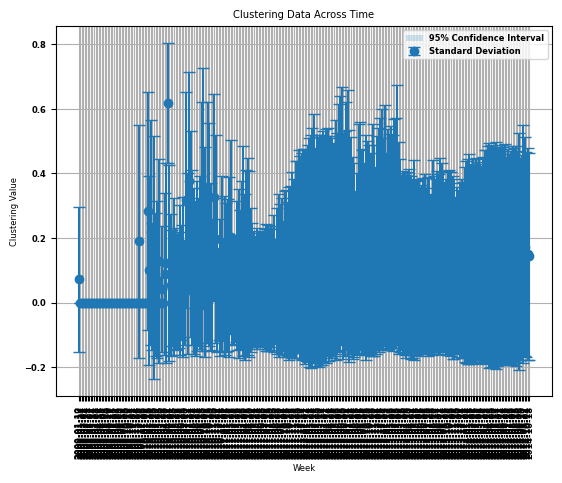

Process terminated, graphs and attributes created.


In [2]:
def daterange(date1, date2, by=1):
    return [  date1 + timedelta(n) for n in range(0, int((date2 - date1).days)+1, by) ]       

start_date = datetime.strptime("2009-01-10", "%Y-%m-%d").date()
end_date = datetime.strptime("2014-10-18", "%Y-%m-%d").date()
print(f'start_date is set as: {start_date}')
print(f'end_date is set as: {end_date}')

datelist = daterange(start_date, end_date, by=7)
tqdm_bar = tqdm(datelist, desc="processed files")

x_values = []
y_values_mean = []
y_values_std = []
confidence_intervals = []

for timeunit in tqdm_bar:
    networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
    unit_graph_file = f"{networks_path}/{timeunit}.graphml.bz2"
    try:
        g = gt.load_graph(unit_graph_file)      
        ER = gt.GraphView(g, directed=True) # Get graph view for random version
    except OSError:
        continue
    # build_network_with_attributes(timeunit)
    clustering = gt.local_clustering(g).a

    x_values.append(timeunit.strftime('%Y-%m-%d'))
    y_values_mean.append(float(np.mean(clustering)))
    y_values_std.append(float(np.std(clustering)))
    confidence_intervals.append(1.96 * np.std(clustering) / np.sqrt(len(clustering)))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 6}

matplotlib.rc('font', **font)

plt.errorbar(x_values, y_values_mean, yerr=y_values_std, fmt='o', capsize=4, label='Standard Deviation')
plt.fill_between(x_values, np.subtract(y_values_mean, confidence_intervals), np.add(y_values_mean, confidence_intervals), alpha=0.2, label='95% Confidence Interval')
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Clustering Value')
plt.title('Clustering Data Across Time')
plt.legend()
plt.grid(True)
plt.show()

    
                    
print('Process terminated, graphs and attributes created.')

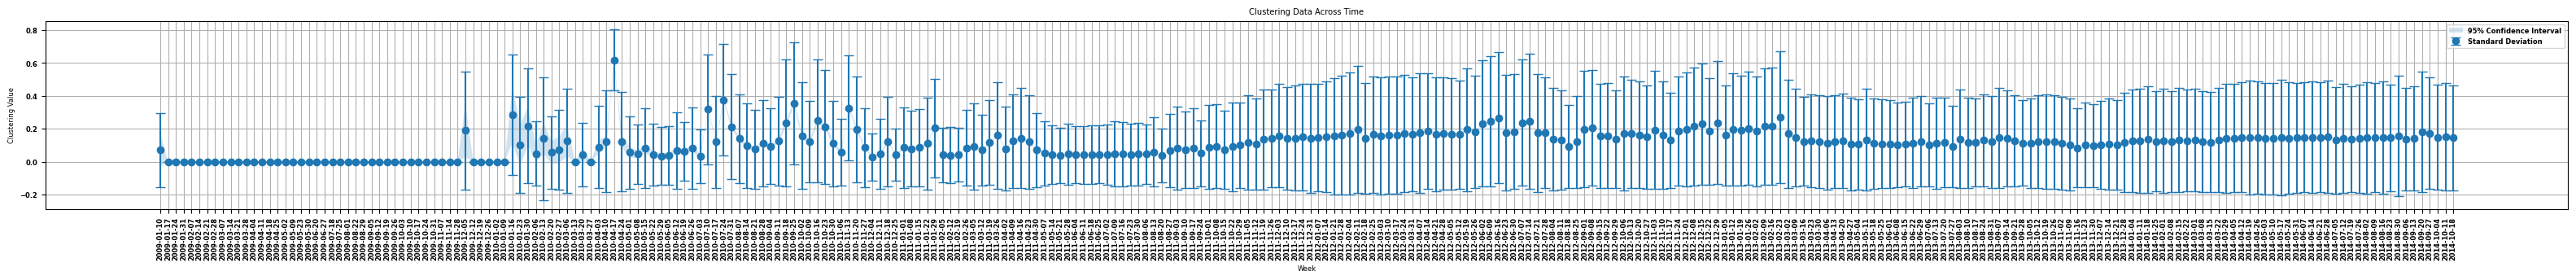

In [5]:
plt.errorbar(x_values, y_values_mean, yerr=y_values_std, fmt='o', capsize=4, label='Standard Deviation')
plt.fill_between(x_values, np.subtract(y_values_mean, confidence_intervals), np.add(y_values_mean, confidence_intervals), alpha=0.2, label='95% Confidence Interval')
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Clustering Value')
plt.title('Clustering Data Across Time')
plt.legend()
plt.rcParams["figure.figsize"] = (60,3)
plt.grid(True)
plt.show()

In [25]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
g = gt.load_graph(unit_graph_file)

clustering = gt.local_clustering(g).a

dist_map = gt.shortest_distance(g)[0]
average_path_length = np.mean(dist_map.a)
network_diameter = np.max(dist_map.a)

print("Clustering Coefficient:", np.mean(clustering))
print("Average Path Length:", average_path_length*0.00000001)
print("Network Diameter:", network_diameter*0.00000001)

Clustering Coefficient: 0.28518518518518515
Average Path Length: 19.088743529444443
Network Diameter: 21.47483647


In [40]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
g = gt.load_graph(unit_graph_file)
print(g)

clustering = gt.local_clustering(g).a

# Remove the edge weights from the graph
g.clear_edges()

# Get all vertex descriptors in the graph
vertices = g.get_vertices()

# Compute the shortest path lengths for all pairs of vertices
path_lengths = []

for v in vertices:
    shortest_path_length = gt.shortest_distance(g, source=v).a

    # Exclude infinite values (no path)
    finite_lengths = shortest_path_length[np.isfinite(shortest_path_length)]
    path_lengths.extend(finite_lengths)

# Compute the average path length
average_path_length = np.mean(path_lengths)

# Compute the network diameter
network_diameter = np.max(path_lengths)

print("Clustering Coefficient:", np.mean(clustering))
print("Average Path Length:", average_path_length)
print("Network Diameter:", network_diameter)

<Graph object, directed, with 18 vertices and 21 edges, 5 internal vertex properties, 3 internal edge properties, 1 internal graph property, at 0x7f3bfc065430>
Clustering Coefficient: 0.28518518518518515
Average Path Length: 2028178999.9444444
Network Diameter: 2147483647


In [44]:


networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2014-10-18.graphml.bz2"
G = nx.read_graphml(unit_graph_file)

# Compute the clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Compute the average path length and network diameter for each strongly connected component
components = nx.strongly_connected_components(G)
for component in components:
    subgraph = G.subgraph(component)
    average_path_length = nx.average_shortest_path_length(subgraph)
    network_diameter = nx.diameter(subgraph)
    print("Component Average Path Length:", average_path_length)
    print("Component Network Diameter:", network_diameter)

print("Clustering Coefficient:", clustering_coefficient)

Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 1.0
Component Network Diameter: 1
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Diameter: 0
Component Average Path Length: 0
Component Network Di

# Participation Coeff

In [47]:
networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
unit_graph_file = f"{networks_path}/2010-01-16.graphml.bz2"
g = gt.load_graph(unit_graph_file)
print(g)

# Perform community detection using Louvain method
state = gt.minimize_nested_blockmodel_dl(g)

# Get the community membership for each node
membership = state.get_levels()[0].get_blocks().a

# Compute the degree for each node
degrees = g.degree_property_map("total").a

# Compute the participation coefficient for each node
participation_coefficients = []
for v in g.vertices():
    node_community = membership[int(v)]
    node_neighbors = set(g.get_out_neighbours(v)) | set(g.get_in_neighbours(v))
    degree_within_community = sum(1 for neighbor in node_neighbors if membership[int(neighbor)] == node_community)
    degree_total = degrees[int(v)]
    participation_coefficient = 1.0 - (degree_within_community / degree_total) ** 2
    participation_coefficients.append(participation_coefficient)

# Print the participation coefficients
for v, pc in zip(g.vertices(), participation_coefficients):
    print(f"Node {int(v)}: Participation Coefficient = {pc}")

<Graph object, directed, with 18 vertices and 21 edges, 5 internal vertex properties, 3 internal edge properties, 1 internal graph property, at 0x7f3bf3ad16d0>
Node 0: Participation Coefficient = 0.0
Node 1: Participation Coefficient = 0.0
Node 2: Participation Coefficient = 0.0
Node 3: Participation Coefficient = 0.0
Node 4: Participation Coefficient = 0.0
Node 5: Participation Coefficient = 0.0
Node 6: Participation Coefficient = 0.0
Node 7: Participation Coefficient = 0.18999999999999995
Node 8: Participation Coefficient = 0.0
Node 9: Participation Coefficient = 0.0
Node 10: Participation Coefficient = 0.0
Node 11: Participation Coefficient = 0.0
Node 12: Participation Coefficient = 0.5555555555555556
Node 13: Participation Coefficient = 0.0
Node 14: Participation Coefficient = 0.0
Node 15: Participation Coefficient = 0.0
Node 16: Participation Coefficient = 0.0
Node 17: Participation Coefficient = 0.0


# Community Correlation

start_date is set as: 2011-01-08
end_date is set as: 2011-01-22


processed files:   0%|          | 0/3 [00:00<?, ?it/s]/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/user/yassine/miniconda3/envs/gt/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
processed files:  33%|███▎      | 1/3 [00:09<00:18,  9.15s/it]

vertex:0 , block 5096
vertex:1 , block 5096
vertex:2 , block 5096
vertex:3 , block 5096
vertex:4 , block 3498
vertex:5 , block 3498
vertex:6 , block 2513
vertex:7 , block 3498
vertex:8 , block 3498
vertex:9 , block 2513
vertex:10 , block 3498
vertex:11 , block 3498
vertex:12 , block 2513
vertex:13 , block 3498
vertex:14 , block 3498
vertex:15 , block 2513
vertex:16 , block 3498
vertex:17 , block 3498
vertex:18 , block 2513
vertex:19 , block 3498
vertex:20 , block 5096
vertex:21 , block 3498
vertex:22 , block 3498
vertex:23 , block 3498
vertex:24 , block 2513
vertex:25 , block 3498
vertex:26 , block 3498
vertex:27 , block 2513
vertex:28 , block 2513
vertex:29 , block 5096
vertex:30 , block 3498
vertex:31 , block 2513
vertex:32 , block 3498
vertex:33 , block 2513
vertex:34 , block 3498
vertex:35 , block 5096
vertex:36 , block 5096
vertex:37 , block 5096
vertex:38 , block 5096
vertex:39 , block 3498
vertex:40 , block 2513
vertex:41 , block 2513
vertex:42 , block 3498
vertex:43 , block 509

processed files:  67%|██████▋   | 2/3 [00:13<00:06,  6.48s/it]

vertex:0 , block 4516
vertex:1 , block 181
vertex:2 , block 4387
vertex:3 , block 181
vertex:4 , block 4387
vertex:5 , block 4387
vertex:6 , block 2368
vertex:7 , block 4387
vertex:8 , block 4387
vertex:9 , block 4387
vertex:10 , block 4387
vertex:11 , block 4387
vertex:12 , block 4387
vertex:13 , block 700
vertex:14 , block 700
vertex:15 , block 4516
vertex:16 , block 4387
vertex:17 , block 4387
vertex:18 , block 2368
vertex:19 , block 4387
vertex:20 , block 4387
vertex:21 , block 4387
vertex:22 , block 700
vertex:23 , block 700
vertex:24 , block 700
vertex:25 , block 4387
vertex:26 , block 4387
vertex:27 , block 4387
vertex:28 , block 4516
vertex:29 , block 4387
vertex:30 , block 4387
vertex:31 , block 2368
vertex:32 , block 4387
vertex:33 , block 4387
vertex:34 , block 2368
vertex:35 , block 4387
vertex:36 , block 4387
vertex:37 , block 4387
vertex:38 , block 2368
vertex:39 , block 4387
vertex:40 , block 4387
vertex:41 , block 2368
vertex:42 , block 4387
vertex:43 , block 4387
verte

processed files: 100%|██████████| 3/3 [00:18<00:00,  6.02s/it]

vertex:0 , block 1
vertex:1 , block 2
vertex:2 , block 4763
vertex:3 , block 6271
vertex:4 , block 6271
vertex:5 , block 1192
vertex:6 , block 1192
vertex:7 , block 1192
vertex:8 , block 1185
vertex:9 , block 6271
vertex:10 , block 5917
vertex:11 , block 5917
vertex:12 , block 3475
vertex:13 , block 3866
vertex:14 , block 483
vertex:15 , block 3866
vertex:16 , block 3866
vertex:17 , block 3866
vertex:18 , block 4549
vertex:19 , block 4549
vertex:20 , block 4549
vertex:21 , block 1912
vertex:22 , block 6271
vertex:23 , block 4549
vertex:24 , block 1185
vertex:25 , block 4549
vertex:26 , block 3866
vertex:27 , block 5031
vertex:28 , block 1912
vertex:29 , block 1185
vertex:30 , block 4549
vertex:31 , block 6271
vertex:32 , block 1192
vertex:33 , block 5031
vertex:34 , block 5031
vertex:35 , block 483
vertex:36 , block 483
vertex:37 , block 483
vertex:38 , block 1185
vertex:39 , block 1
vertex:40 , block 5031
vertex:41 , block 1192
vertex:42 , block 1912
vertex:43 , block 1912
vertex:44 ,

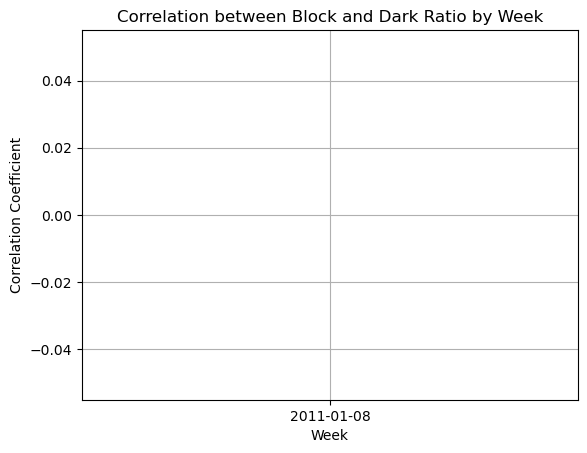

Process terminated, graphs and attributes created.


In [2]:
def daterange(date1, date2, by=1):
    return [  date1 + timedelta(n) for n in range(0, int((date2 - date1).days)+1, by) ]       

start_date = datetime.strptime("2011-01-08", "%Y-%m-%d").date()
end_date = datetime.strptime("2011-01-22", "%Y-%m-%d").date()
print(f'start_date is set as: {start_date}')
print(f'end_date is set as: {end_date}')

datelist = daterange(start_date, end_date, by=7)
tqdm_bar = tqdm(datelist, desc="processed files")

x_values = []
corr_values = []


for timeunit in tqdm_bar:
    networks_path = f"/srv/abacus-1/bitcoin_darknet/grayscale_op_ali/heur_1_data_v3/heur_1_networks_full/week"
    unit_graph_file = f"{networks_path}/{timeunit}.graphml.bz2"
    try:
        g = gt.load_graph(unit_graph_file)      
    except OSError:
        continue
    
    state = gt.minimize_blockmodel_dl(g)
    blocks = state.get_blocks()

    # Iterate over the vertices and assign the block values as vertex attributes
    block_property = g.new_vertex_property("int")
    for vertex in g.vertices():
        block_property[vertex] = blocks[vertex]
        print(f'vertex:{vertex} , block {blocks[vertex]}')

    # Add the block_property as a vertex attribute
    g.vertex_properties["block"] = block_property

    # Access the node properties
    block_prop = g.vp.block
    dark_ratio_prop = g.vp.dark_ratio

    # Extract attribute values
    block_values = np.array(block_prop.a)
    dark_ratio_values = np.array(dark_ratio_prop.a)

    # Calculate the correlation coefficient
    correlation_matrix = np.corrcoef(block_values, dark_ratio_values)
    correlation = correlation_matrix[0, 1]
    print(correlation)
    

    x_values.append(timeunit.strftime('%Y-%m-%d'))
    corr_values.append(float(correlation))

plt.plot(x_values, corr_values, marker='o')
plt.xlabel('Week')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Block and Dark Ratio by Week')
plt.grid(True)
plt.show()

    
                    
print('Process terminated, graphs and attributes created.')

# DNM Validation

In [48]:
import csv

# Read the CSV file
csv_file = 'walletexplorer_DNM/CannabisRoadMarket.csv'
output_file = 'walletexplorer_DNM/CannabisRoadMarket.json'
date_format = '%Y-%m-%d %H:%M:%S'

# Read the balances from the CSV file
balances = {}
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    next(reader)
    # Iterate over the rows and store the last balance for each date
    for row in reader:
        date_str = row[0].strip()
        balance_list = row[5]
        print(date_str)
        # Parse the date and get the last balance for each date
        date = datetime.strptime(date_str, date_format).date()
        balances[date] = balance_list

# Find the earliest and latest dates in the balances
earliest_date = min(balances.keys())
latest_date = max(balances.keys())

# Generate the JSON data
start_date = datetime.strptime('2009-01-03', '%Y-%m-%d').date()
end_date = datetime.strptime('2018-05-12', '%Y-%m-%d').date()
delta = timedelta(days=7)

json_data = {}
current_date = start_date
previous_balance = '0'

while current_date <= end_date:
    if current_date < earliest_date:
        json_data[str(current_date)] = float(previous_balance)
    elif current_date in balances:
        json_data[str(current_date)] = float(balances[current_date])
        previous_balance = balances[current_date]
    else:
        json_data[str(current_date)] = float(previous_balance)
    current_date += delta

# Write the JSON data to a file
with open(output_file, 'w') as file:
    json.dump(json_data, file)

print("JSON file generated successfully.")

2016-08-23 15:45:26
2014-08-25 11:01:28
2014-08-25 11:01:28
2014-08-25 11:01:28
2014-08-25 11:01:28
2014-08-25 11:01:28
2014-08-25 11:01:28
2014-08-25 11:01:28
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:49:42
2014-08-25 10:27:36
2014-08-25 10:27:36
2014-08-25 10:27:36
2014-08-25 10:27:36
2014-08-25 10:27:36
2014-08-25 10:27:36
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 10:07:34
2014-08-25 09:25:15
2014-08-25 09:11:59
2014-08-25 09:11:59
2014-08-25 09:11:59
2014-08-25 09:11:59
2014-08-25 09:11:59
2014-08-25 08:53:31
2014-08-25 07:22:42
2014-08-25 07:05:34
2014-08-25 07:05:34
2014-08-25 06:49:11
2014-08-25 06:49:11
2014-08-25 06:49:11
2014-08-25 06:07:47
2014-08-25 06:07:47
2014-08-25 06:07:47


In [6]:
import csv
# del list
# Read the CSV file
csv_file = 'walletexplorer_DNM/CannabisRoadMarket.csv'
output_file = 'walletexplorer_DNM/CannabisRoadMarket.json'
date_format = '%Y-%m-%d %H:%M:%S'

# Read the balances from the CSV file
balances = defaultdict(list)
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    next(reader)
    for row in reader:
        date_str = row[0].strip()
        balance_row = row[5]
        date = datetime.strptime(date_str, date_format).date()
        # balances[date] = balance
        # balances[date].append(balance_row)
        balances[date].insert(0, balance_row)

# Find the earliest and latest dates in the balances
earliest_date = min(balances.keys())
latest_date = max(balances.keys())

# Generate the JSON data
start_date = datetime.strptime('2009-01-03', '%Y-%m-%d').date()
end_date = datetime.strptime('2018-05-12', '%Y-%m-%d').date()
delta = timedelta(days=7)

# #test
# for key, list in balances.items():
#     print(f'key:{key}, list of balances:{list}')

json_data = {}
current_date = start_date
ending_value = balances[latest_date][0]

while current_date <= end_date:
    if current_date < earliest_date:
        json_data[str(current_date)] = 0.0  # Add zero before earliest_date
    elif current_date > latest_date:
        json_data[str(current_date)] = ending_value  # Add zero after latest_date
    else:
        week_start = current_date
        week_end = current_date + delta
        
        # Find the balance for the current week from the last entry in the CSV
        last_balance = '0'
        for date, balance_list in balances.items():
            # if week_start <= date < week_end:
            if date == week_end:
                last_balance = balance_list[-1]
            # print(f'date:{date}, balance: {balance_list[-1]}')
        
        json_data[str(current_date)] = float(last_balance)

        # print(f'Last balance for the date:{date}, last_balance: {last_balance}')
        
    
    current_date += delta

# Write the JSON data to a file
with open(output_file, 'w') as file:
    json.dump(json_data, file)

print("JSON file generated successfully.")

JSON file generated successfully.


No handles with labels found to put in legend.


start_date is set as: 2013-03-02
end_date is set as: 2013-03-16


/tmp/ipykernel_534403/2192621936.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  matplotlib.pyplot.plot_date(dates, wallet_explorer, 'k--', color='green', linewidth=3, label="wallet_explorer")
/tmp/ipykernel_534403/2192621936.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  matplotlib.pyplot.plot_date(dates, PIG, 'k--', color='black', linewidth=3, label="Paint it gray")


Text(0.5, 1.0, 'Comparison for CannabisRoadMarket')

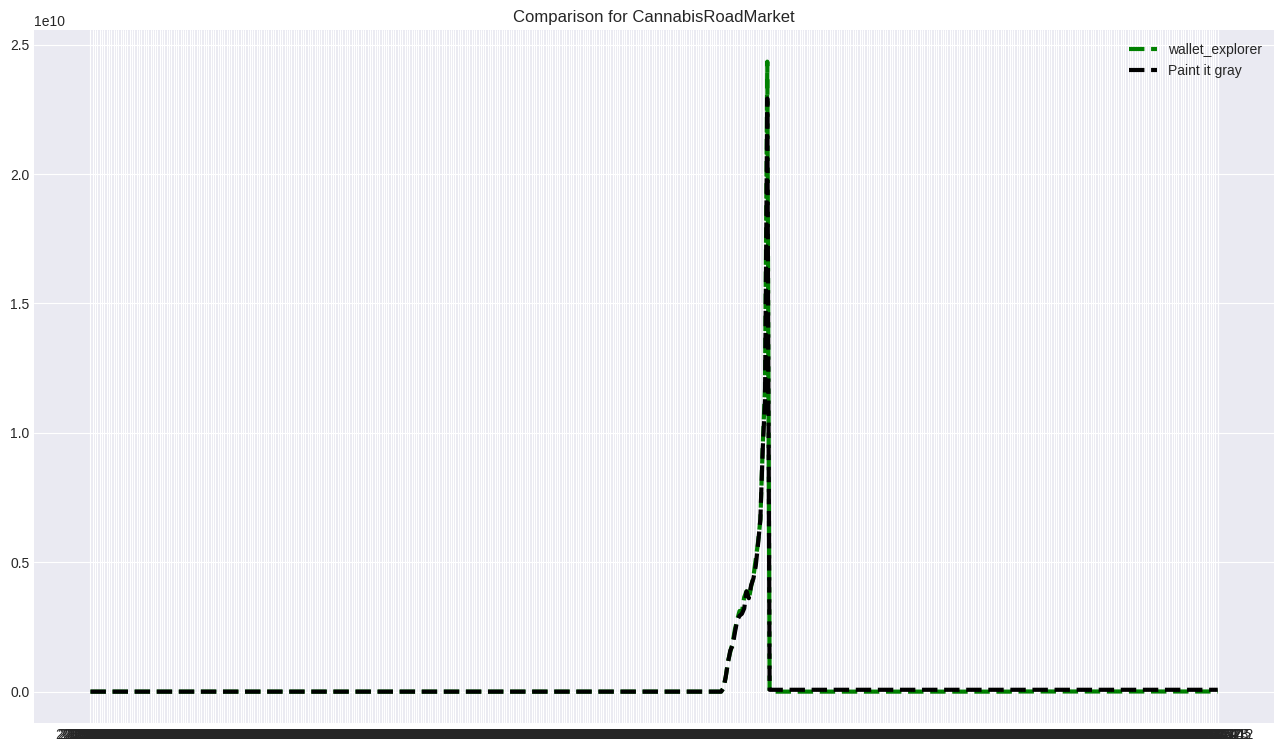

In [7]:
def daterange(date1, date2, by=1):
    return [  date1 + timedelta(n) for n in range(0, int((date2 - date1).days)+1, by) ]

start_date = datetime.strptime("2013-03-02", "%Y-%m-%d").date()
end_date = datetime.strptime("2013-03-16", "%Y-%m-%d").date()
print(f'start_date is set as: {start_date}')
print(f'end_date is set as: {end_date}')
datelist = daterange(start_date, end_date, by=7)

x_values = []
wallet_explorer = []
PIG = []

with open('walletexplorer_DNM/CannabisRoadMarket.json', 'r') as f:
    load_json = json.load(f)
    for iterator in load_json:
        x_values.append(iterator)
        wallet_explorer.append(float(load_json[iterator]) * 100000000)

with open('jsonResults_v3/h1/total_assets_CannabisRoadMarket_2009-01-03_2018-05-12.json', 'r') as f:
    load_json = json.load(f)
    for iterator in load_json:
        PIG.append(float(load_json[iterator]))

dates = x_values
fig = matplotlib.pyplot.figure(figsize=(16, 9), dpi=100)
matplotlib.pyplot.style.use('seaborn-darkgrid')
matplotlib.pyplot.legend(loc="upper left")
matplotlib.pyplot.plot_date(dates, wallet_explorer, 'k--', color='green', linewidth=3, label="wallet_explorer")
matplotlib.pyplot.plot_date(dates, PIG, 'k--', color='black', linewidth=3, label="Paint it gray")
matplotlib.pyplot.legend()
matplotlib.pyplot.gca().set_title("Comparison for CannabisRoadMarket")